In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prophet as pt
import mplfinance as mpf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
df = pd.read_csv('COCO_COLA.csv')
print(f'Shape of Data set{df.shape}')
df.head(5)

Shape of Data set(15096, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/1962,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1/3/1962,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1/4/1962,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1/5/1962,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1/8/1962,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [169]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [170]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  15096.000000  15096.000000  15096.000000  15096.000000  15096.000000   
mean      16.056202     16.188428     15.921876     16.060734     11.367487   
std       16.939301     17.064336     16.811753     16.941712     14.253637   
min        0.192708      0.193359      0.182292      0.192057      0.037855   
25%        0.860677      0.869792      0.854167      0.860352      0.242312   
50%        9.328125      9.398438      9.218750      9.351562      4.642848   
75%       28.875000     29.167500     28.563125     28.901562     17.251080   
max       59.810001     60.130001     59.619999     60.130001     58.650002   

             Volume  
count  1.509600e+04  
mean   9.032904e+06  
std    7.935744e+06  
min    7.680000e+04  
25%    2.812800e+06  
50%    7.585200e+06  
75%    1.291275e+07  
max    1.241690e+08  


In [171]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [172]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [173]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999938  0.999929  0.999883   0.971996  0.472328
High       0.999938  1.000000  0.999899  0.999942   0.971578  0.473719
Low        0.999929  0.999899  1.000000  0.999939   0.972530  0.470407
Close      0.999883  0.999942  0.999939  1.000000   0.972004  0.471971
Adj Close  0.971996  0.971578  0.972530  0.972004   1.000000  0.452271
Volume     0.472328  0.473719  0.470407  0.471971   0.452271  1.000000


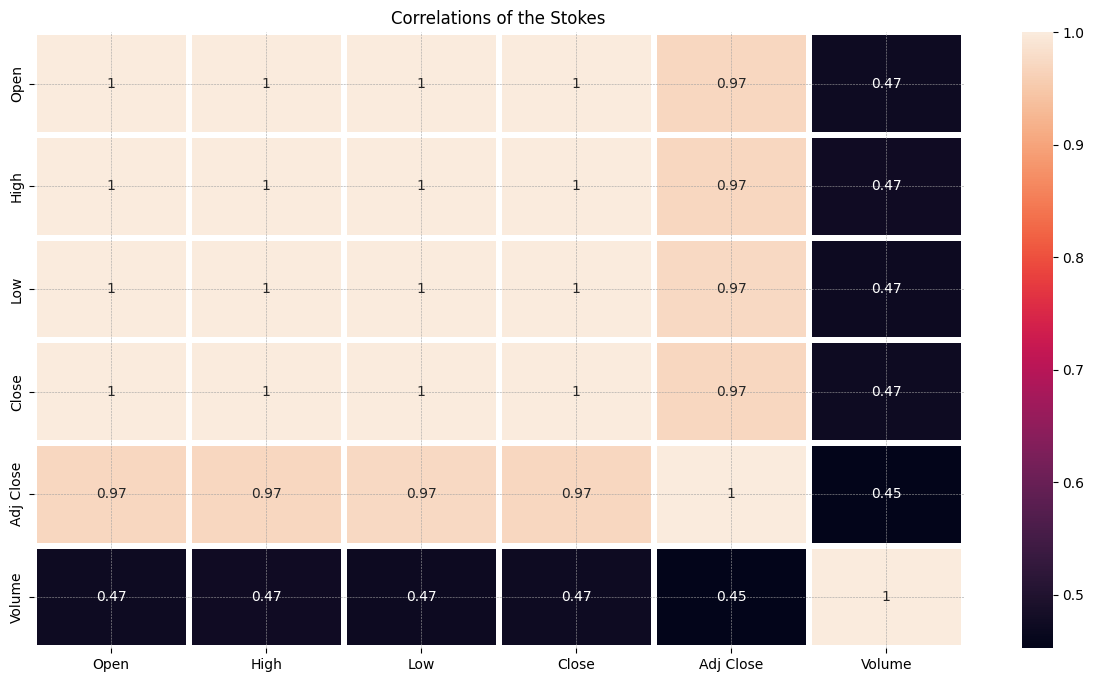

In [174]:
df_corr = df.corr(numeric_only = True)
print(df_corr)

plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, linewidths = 3)
plt.title('Correlations of the Stokes')
plt.show()

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.915166  0.915118  0.915233  0.915159   0.875084   
Open       0.915166  1.000000  0.999938  0.999929  0.999883   0.971996   
High       0.915118  0.999938  1.000000  0.999899  0.999942   0.971578   
Low        0.915233  0.999929  0.999899  1.000000  0.999939   0.972530   
Close      0.915159  0.999883  0.999942  0.999939  1.000000   0.972004   
Adj Close  0.875084  0.971996  0.971578  0.972530  0.972004   1.000000   
Volume     0.621548  0.472328  0.473719  0.470407  0.471971   0.452271   

             Volume  
Date       0.621548  
Open       0.472328  
High       0.473719  
Low        0.470407  
Close      0.471971  
Adj Close  0.452271  
Volume     1.000000  


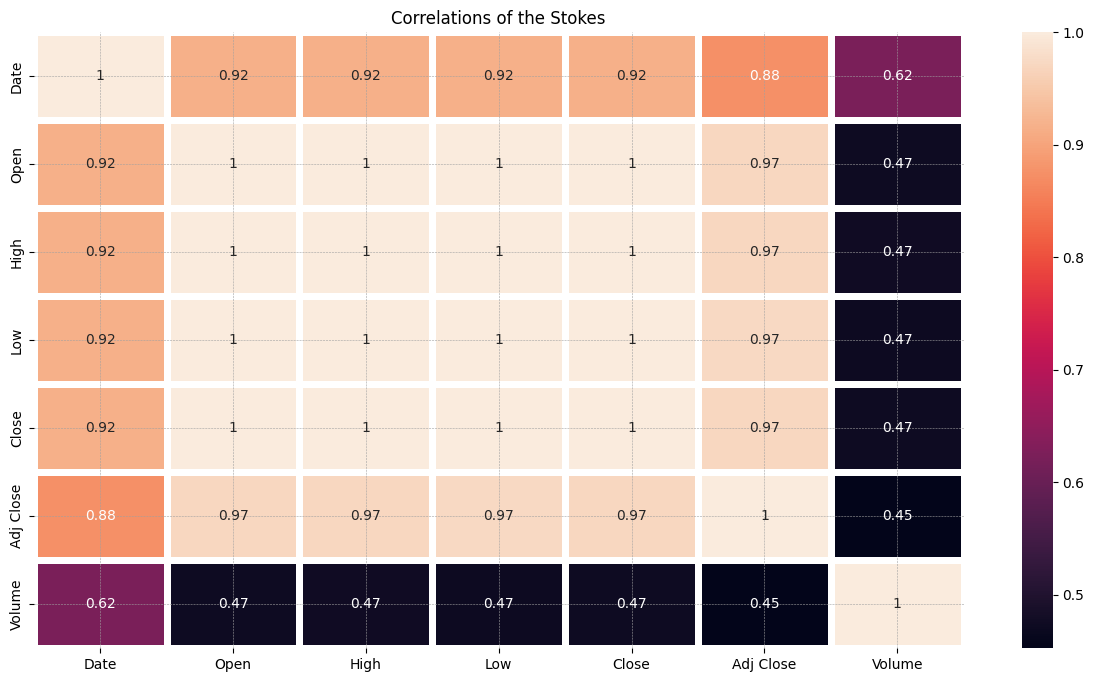

In [175]:
df_corr_d = df.corr()
print(df_corr_d)

plt.figure(figsize=(15, 8))
sns.heatmap(df_corr_d, annot=True, linewidths = 5)
plt.title('Correlations of the Stokes')
plt.show()

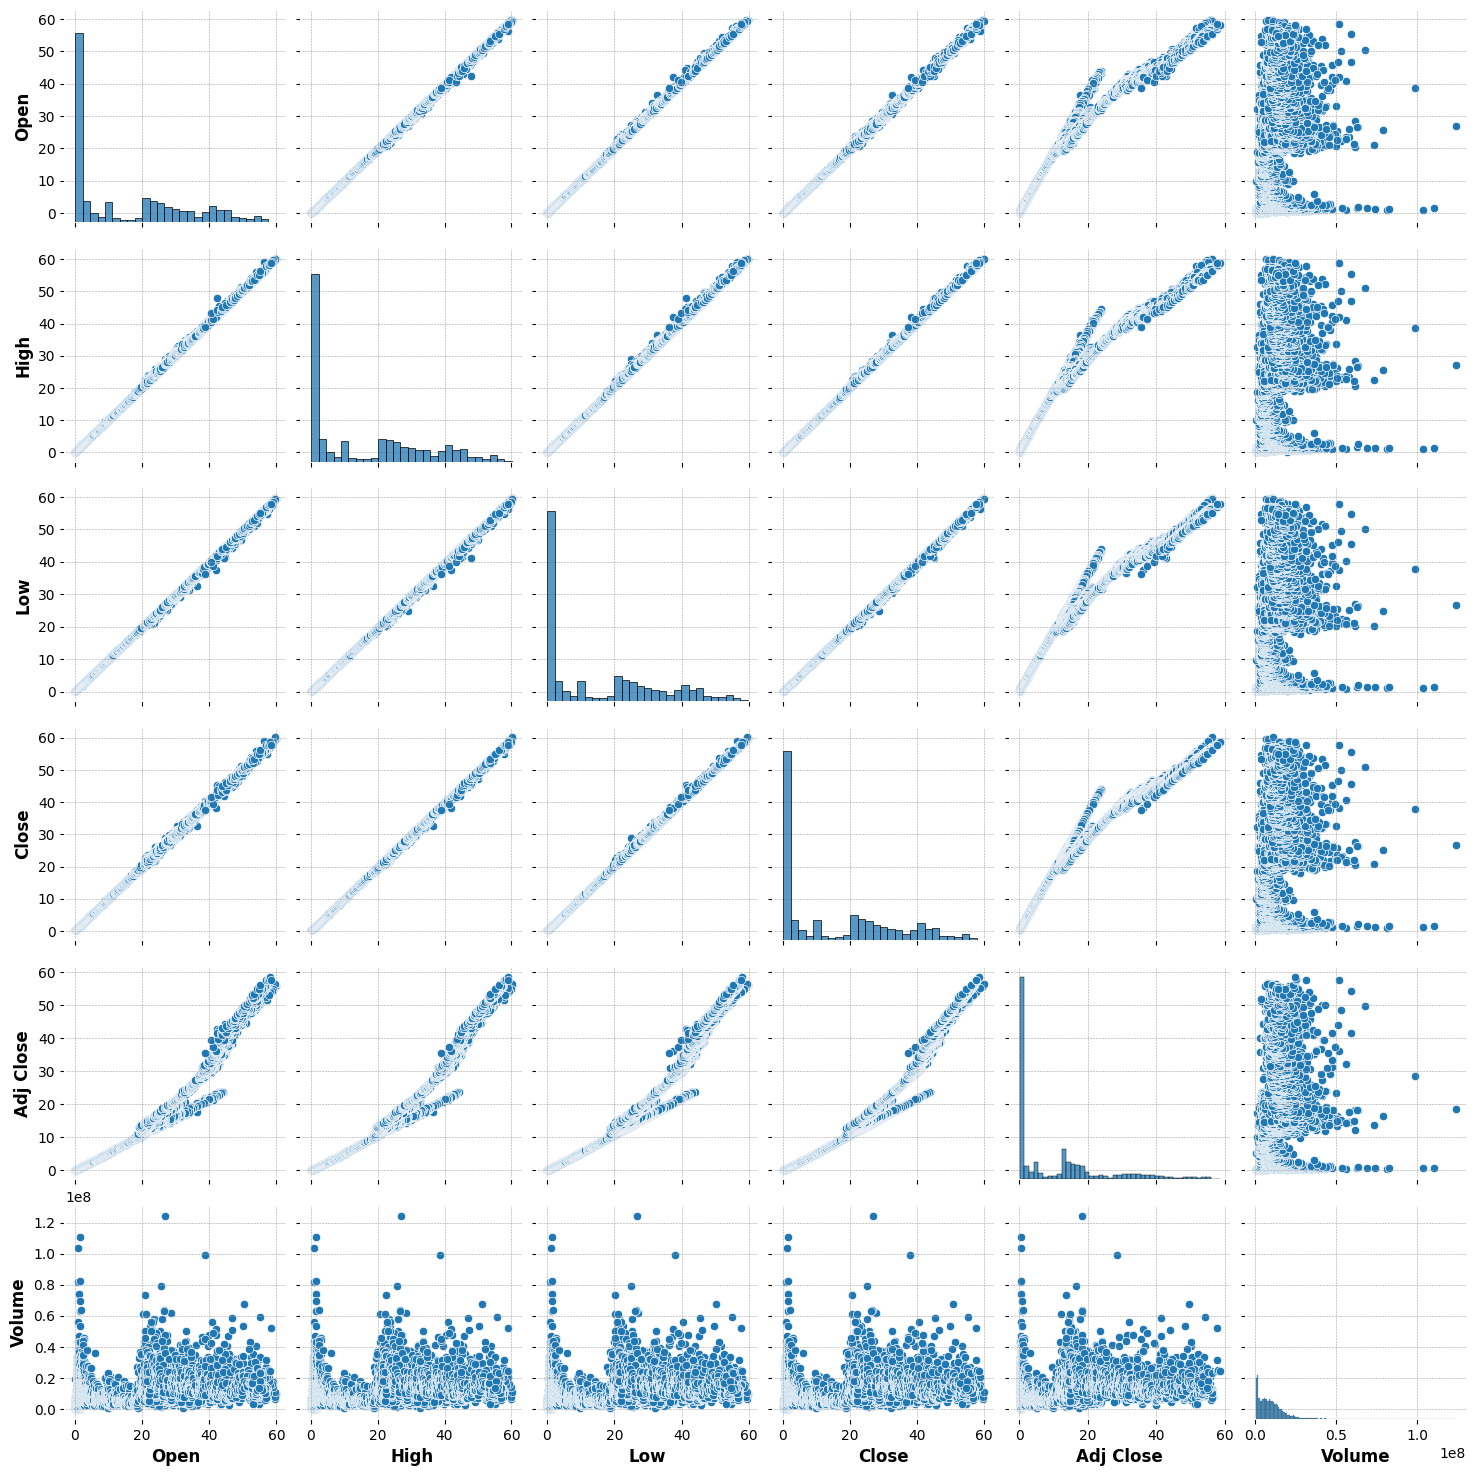

In [176]:
sns.pairplot(df)

In [177]:
df_index = df.copy()

In [178]:
df_index.set_index('Date', inplace=True)
df_index.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [179]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


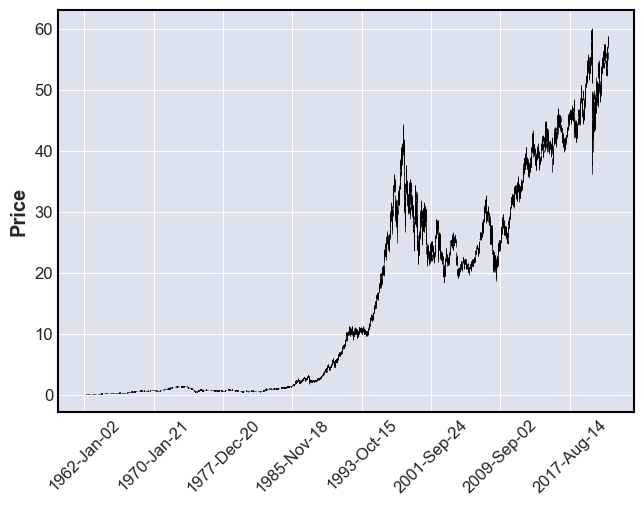

In [180]:
mpf.plot(df_index)

In [181]:
print(df_index.index)

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17'],
              dtype='datetime64[ns]', name='Date', length=15096, freq=None)


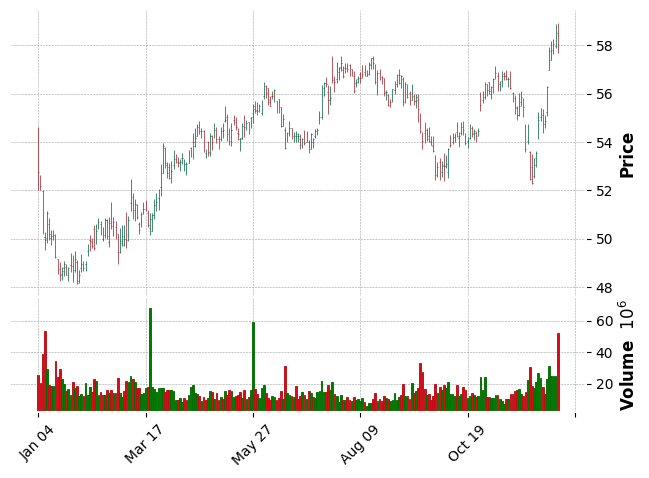

In [182]:
mpf.plot(df_index.loc['2021-1':'2021-12'], style = 'charles', volume = True)

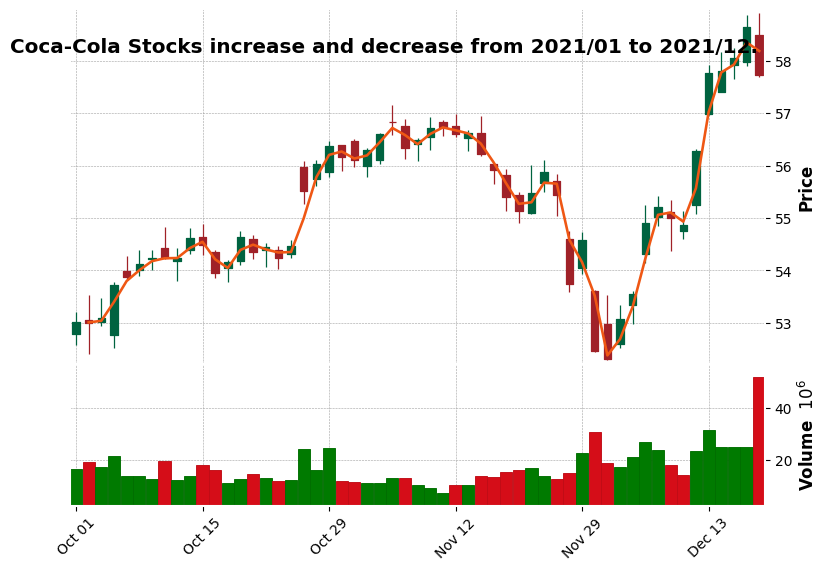

In [183]:
mpf.plot(df_index.loc['2021-10':'2021-12'], 
         mav = (2), 
         type = 'candle', 
         tight_layout = True,
         title = 'Coca-Cola Stocks increase and decrease from 2021/01 to 2021/12.',
         style = 'charles',
         volume = True)

In [184]:
df_ml = df.copy()
df_ml.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [185]:
#df_ml['Year'] = df_ml['Date'].dt.year
#df_ml['Month'] = df_ml['Date'].dt.month
#df_ml['Day'] = df_ml['Date'].dt.day
#df_ml.head()

In [186]:
X = df_ml.drop(['Date','Close'], axis = 1)
Y = df_ml.Close

In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Adj Close  15096 non-null  float64
 4   Volume     15096 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 589.8 KB


In [204]:
X.head(10)

,Open,High,Low,Adj Close,Volume
0,0.263021,0.270182,0.263021,0.051133,806400
1,0.259115,0.259115,0.253255,0.049994,1574400
2,0.257813,0.261068,0.257813,0.050374,844800
3,0.259115,0.262370,0.252604,0.049234,1420800
4,0.251302,0.251302,0.245768,0.048728,2035200
5,0.250651,0.256510,0.248698,0.049614,960000
6,0.255208,0.260091,0.252604,0.049867,1612800
7,0.256510,0.259115,0.255208,0.050374,614400
8,0.259115,0.259115,0.254557,0.049994,883200
9,0.256510,0.256510,0.253906,0.049488,614400


In [189]:
Y.head()

0    0.263021
1    0.257161
2    0.259115
3    0.253255
4    0.250651
Name: Close, dtype: float64

In [190]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [191]:
M_Scale = MinMaxScaler()
X_scaled_minmax = M_Scale.fit_transform(X_scaled)

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size = 0.2)

In [193]:
print(f'Shape of X Train: {X_train.shape}')
print(f'Shape of X Test:{X_test.shape}')

Shape of X Train: (12076, 5)
Shape of X Test:(3020, 5)


In [194]:
M_1 = LinearRegression(fit_intercept = True)

In [195]:
M_1.fit(X_train, Y_train)

LinearRegression()

In [196]:
Y_pred = M_1.predict(X_test)

In [197]:
print(f'Accuracy:- {M_1.score(X_test, Y_test)}')

Accuracy:- 0.9999515790793125


In [198]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error:- {mse}')
print(f'Root Mean Squared Error:- {rmse}')
print(f'Root Squared Error:- {r2}')

Mean Squared Error:- 0.013735952391705976
Root Mean Squared Error:- 0.11720047948581941
Root Squared Error:- 0.9999515790793125


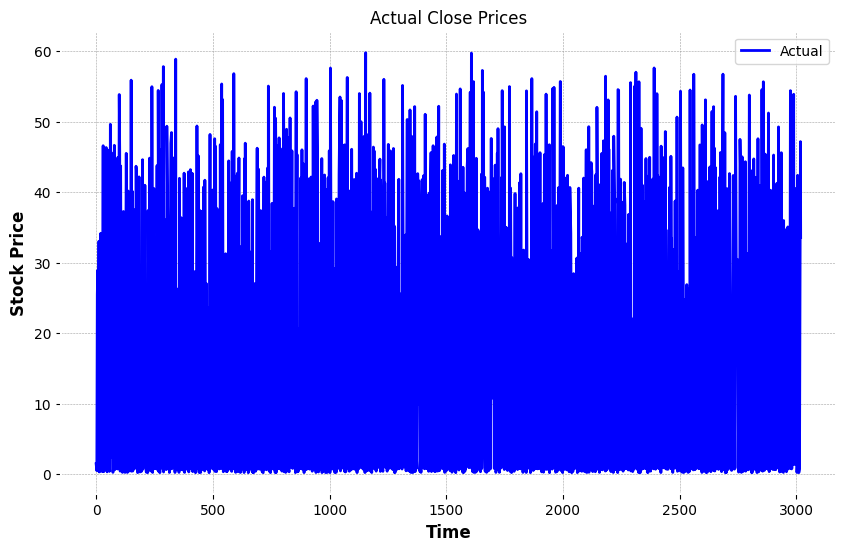

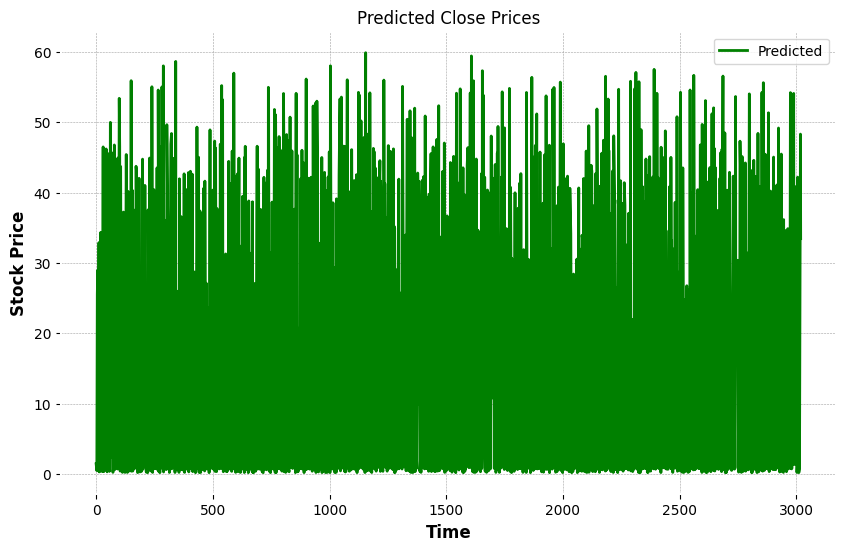

In [199]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual', color='blue')
plt.legend()
plt.title('Actual Close Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_pred, label='Predicted', color='green')
plt.legend()
plt.title('Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [200]:
Y_pred

array([ 1.45741947, 22.86122598,  0.75350992, ..., 31.00696825,
       48.29363081, 33.44770558])

In [201]:
Y.head(20)

0     0.263021
1     0.257161
2     0.259115
3     0.253255
4     0.250651
5     0.255208
6     0.256510
7     0.259115
8     0.257161
9     0.254557
10    0.250000
11    0.242188
12    0.237305
13    0.244792
14    0.246745
15    0.241536
16    0.238932
17    0.236979
18    0.234375
19    0.234375
Name: Close, dtype: float64

In [216]:
R_1 = M_1.predict([[0.263021,0.270182,0.263021,0.051133,806400]])
R_2 = M_1.predict([[0.259115,0.259115,0.253255,0.049994,1574400]])
R_3 = M_1.predict([[0.257813,0.261068,0.257813,0.050374,844800]])
R_4 = M_1.predict([[0.259115,0.26237,0.252604,0.049234,1420800]])
R_5 = M_1.predict([[0.251302,0.251302,0.245768,0.048728,2035200]])
R_6 = M_1.predict([[0.250651,0.256510,0.248698,0.049614,960000]])
R_7 = M_1.predict([[0.255208,0.260091,0.252604,0.049867,1612800]])
R_8 = M_1.predict([[0.256510,0.259115,0.255208,0.050374,614400]])
R_9 = M_1.predict([[0.259115,0.259115,0.254557,0.049994,883200]])
R_10 = M_1.predict([[58.490002,58.919998,57.700001,57.73,51874400]])

#if R_1 < 0.263021:
#    val = 0.263021 - R_1
#    print(val)
#elif R_1 > 0.263021:
#    val = R_1 - 0.263021
#    print(val)
#else:
#    print(val)
    
L_1 = [0.263021 - R_1 if R_1 < 0.263021 else R_1 - 0.263021 if R_1 > 0.263021 else 0.263021]
L_2 = [0.257161 - R_1 if R_1 < 0.257161 else R_1 - 0.257161 if R_1 > 0.257161 else 0.257161]
L_3 = [0.259115 - R_1 if R_1 < 0.259115 else R_1 - 0.259115 if R_1 > 0.259115 else 0.259115]
L_4 = [0.253255 - R_1 if R_1 < 0.253255 else R_1 - 0.253255 if R_1 > 0.253255 else 0.253255]
L_5 = [0.250651 - R_1 if R_1 < 0.250651 else R_1 - 0.250651 if R_1 > 0.250651 else 0.250651]
L_6 = [0.255208 - R_1 if R_1 < 0.255208 else R_1 - 0.255208 if R_1 > 0.255208 else 0.255208]
L_7 = [0.25651 - R_1 if R_1 < 0.25651 else R_1 - 0.25651 if R_1 > 0.25651 else 0.25651]
L_8 = [0.259115 - R_1 if R_1 < 0.259115 else R_1 - 0.259115 if R_1 > 0.263021 else 0.259115]
L_9 = [0.257161 - R_1 if R_1 < 0.257161 else R_1 - 0.257161 if R_1 > 0.257161 else 0.257161]
L_10 = [57.73 - R_1 if R_1 < 57.73 else R_1 - 57.73 if R_1 > 57.73 else 57.73]
    
print(' ')

print('                 |----Predicted results and actual results. And the difference between them.----|')

print(" ")
print(f'Actual Close Value is:- "0.263021". Predicterd Close value is:- "{R_2}" Its Differenet is:- {[L_1]}')

print(" ")
print(f'Actual Close Value is:- "0.257161". Predicterd Close value is:- "{R_2}" Its Differenet is:- {[L_2]}')

print(" ")
print(f'Actua Close Value is:- "0.259115". Predicterd Close value is:- "{R_3}" Its Differenet is:- {[L_3]}')

print(" ")
print(f'Actual Close Value is:- "0.253255". Predicterd Close value is:- "{R_4}" Its Differenet is:- {[L_4]}')

print(" ")
print(f'Actual Close Value is:- "0.250651". Predicterd Close value is:- "{R_5}" Its Differenet is:- {[L_5]}')

print(" ")
print(f'Actual Close Value is:- "0.255208". Predicterd Close value is:- "{R_6}" Its Differenet is:- {[L_6]}')

print(" ")
print(f'Actual Close Value is:- "0.25651". Predicterd Close value is:- "{R_7}" Its Differenet is:- {[L_7]}')

print(" ")
print(f'Actual Close Value is:- "0.259115". Predicterd Close value is:- "{R_8}" Its Differenet is:- {[L_8]}')

print(" ")
print(f'Actual Close Value is:- "0.257161". Predicterd Close value is:- "{R_9}" Its Differenet is:- {[L_9]}')

print(" ") 
print(f'Actual Close Value is:- "57.73". Predicterd Close value is:- "{R_10}" Its Differenet is:- {[L_10]}')

 
                 |----Predicted results and actual results. And the difference between them.----|
 
Actual Close Value is:- "0.263021". Predicterd Close value is:- "[0.25653726]" Its Differenet is:- [[array([0.00755356])]]
 
Actual Close Value is:- "0.257161". Predicterd Close value is:- "[0.25653726]" Its Differenet is:- [[array([0.01341356])]]
 
Actua Close Value is:- "0.259115". Predicterd Close value is:- "[0.2622625]" Its Differenet is:- [[array([0.01145956])]]
 
Actual Close Value is:- "0.253255". Predicterd Close value is:- "[0.2587]" Its Differenet is:- [[array([0.01731956])]]
 
Actual Close Value is:- "0.250651". Predicterd Close value is:- "[0.24879878]" Its Differenet is:- [[array([0.01992356])]]
 
Actual Close Value is:- "0.255208". Predicterd Close value is:- "[0.25572217]" Its Differenet is:- [[array([0.01536656])]]
 
Actual Close Value is:- "0.25651". Predicterd Close value is:- "[0.25881429]" Its Differenet is:- [[array([0.01406456])]]
 
Actual Close Value is:- "0.259

In [223]:
threshold = 0.5
Y_pred_classes = (Y_pred >= threshold).astype(int)
Y_test_classes = (Y_test >= threshold).astype(int)

# Generate classification report
print(classification_report(Y_test_classes, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00      2785

    accuracy                           1.00      3020
   macro avg       1.00      1.00      1.00      3020
weighted avg       1.00      1.00      1.00      3020



In [217]:
len(Y_pred)

3020

In [220]:
len(Y_test)

3020